# Pre-processamento de todas as imagens de pragas

In [ ]:
# Imports
import cv2
import glob
import os
import numpy as np 
import pathlib
import matplotlib.pyplot as plt  
from PIL import Image
import IPython.display as display
from skimage.transform import resize

In [3]:

# Imports de avisos
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Imports para manipulacao de dados e calculos matematicos
import os
import pandas as pd
import numpy as np
import math, re, time
import pathlib

# Import para manipulação das imagens
import matplotlib.pyplot as plt
from matplotlib import pyplot
import IPython.display as display
from PIL import Image
from skimage.transform import resize
import cv2

# Imports de bibliotecas para treinamento de redes neurais
import tensorflow as tf
from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.models import Sequential, Model
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D 
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.optimizers import RMSprop
from keras.applications import VGG19, ResNet50

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

print("Tensorflow version " + tf.__version__)
AUTO = tf.data.experimental.AUTOTUNE

Tensorflow version 2.2.0


## Carregando dataset de imagens de Pragras

In [4]:
# Importando o dataset do diretorio de treino
data_dir = pathlib.Path('Imagens/treino_v2')

# Verificando quantas imagens tem nos diretórios
image_count = len(list(data_dir.glob('*/*.png')))
print('Quantidade de Imagens: ', image_count)

# Verificando todas as classes de pragas (menos a pasta .DS_Store)
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != ".DS_Store"])

# Print das categorias de pragas
print('Classes: ', CLASS_NAMES)

# Visualizando o tamanho de cada classe
fnames = []
for classes in CLASS_NAMES:
    flower_folder = os.path.join(data_dir, classes)
    file_names    = os.listdir(flower_folder)
    full_path     = [os.path.join(flower_folder, file_name) for file_name in file_names]
    fnames.append(full_path)

print('Tamanho de cada classe de pragas:', [len(f) for f in fnames])

Quantidade de Imagens:  45
Classes:  ['lagarta' 'percevejo_marrom' 'percevejo_pequeno' 'percevejo_verde']
Tamanho de cada classe de pragas: [14, 11, 14, 10]


## Visualização dos Dados

In [5]:
lagarta            = list(data_dir.glob('lagarta/*.png'))
percevejo_marrom   = list(data_dir.glob('percevejo_marrom/*.png'))
percevejo_pequeno  = list(data_dir.glob('percevejo_pequeno/*.png'))
percevejo_verde    = list(data_dir.glob('percevejo_verde/*.png'))

(792, 202)


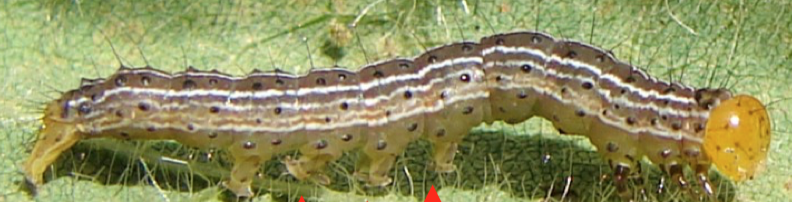

(590, 332)


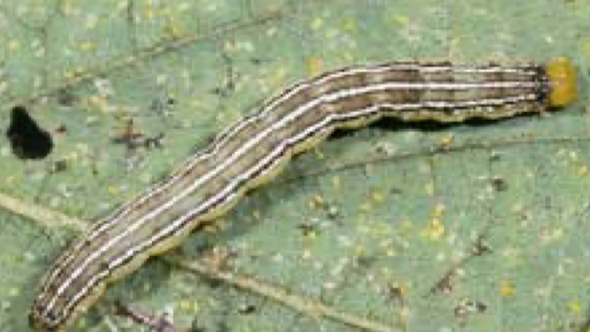

(342, 406)


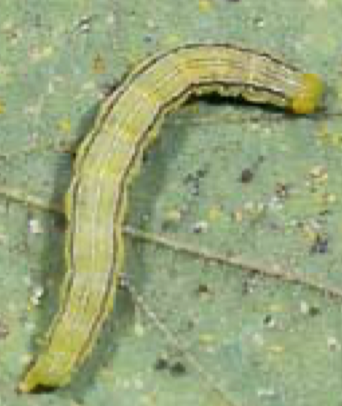

In [6]:
# Visualizando fotos de lagarta
for image_path in lagarta[:3]:
    print(Image.open(str(image_path)).size)
    display.display(Image.open(str(image_path)))

(792, 630)


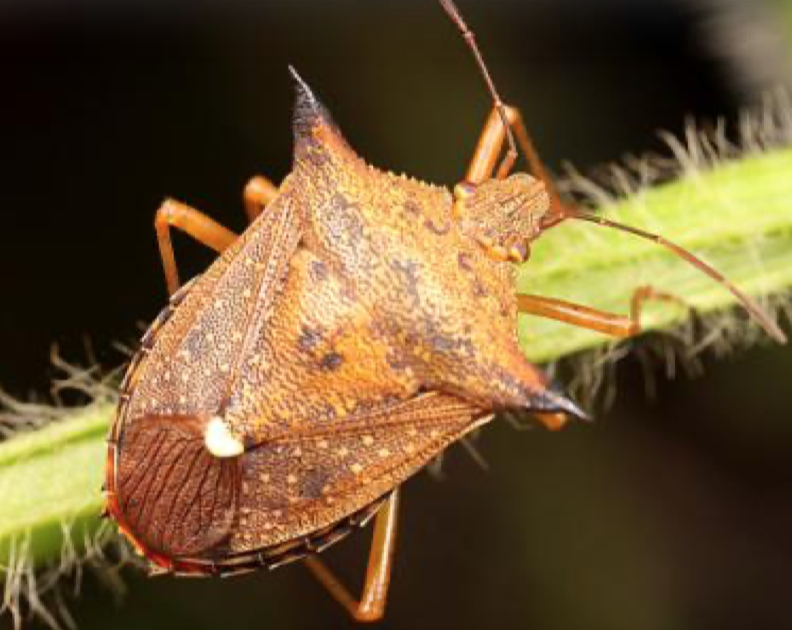

(554, 558)


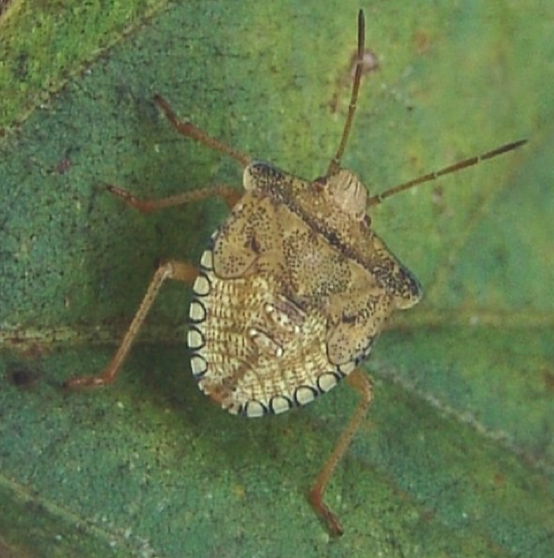

(564, 416)


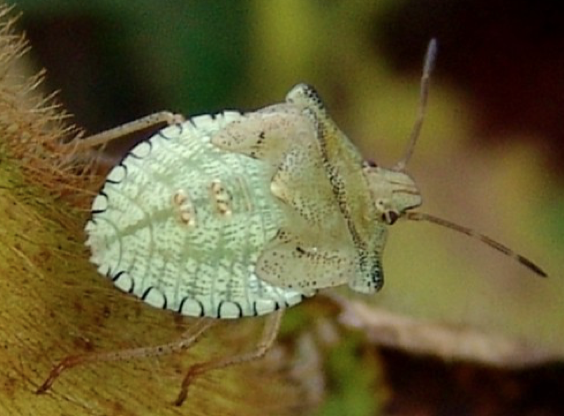

In [7]:
# Visualizando fotos de percevejo marrom
for image_path in percevejo_marrom[:3]:
    print(Image.open(str(image_path)).size)
    display.display(Image.open(str(image_path)))

## Preparação dos Dados
- Redimensionar todas as imagens para um size específico (no caso 512 x 512)
- Separar 80% de amostras para treinamento e 20% para validação
- Converter em formato numpy Keras

In [8]:
# Carregando as imagens das fotos usando CV2
images = []
for names in fnames:
    one_class_images = [cv2.imread(name) for name in names if (cv2.imread(name)) is not None]
    images.append(one_class_images)

In [9]:
# Verificando qual o melhor shape para o redimensionamento de todas as fotos
for i,imgs in enumerate(images):
    shapes  = [img.shape for img in imgs]
    widths  = [shape[0] for shape in shapes]
    heights = [shape[1] for shape in shapes]
    print('%d,%d é o menor shape para %s' % (np.min(widths), np.min(heights), CLASS_NAMES[i]))

168,342 é o menor shape para lagarta
322,296 é o menor shape para percevejo_marrom
360,554 é o menor shape para percevejo_pequeno
316,328 é o menor shape para percevejo_verde


In [10]:
# Função para converter as imagens para formato RGB
def convert_to_RGB(img):
    return cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)

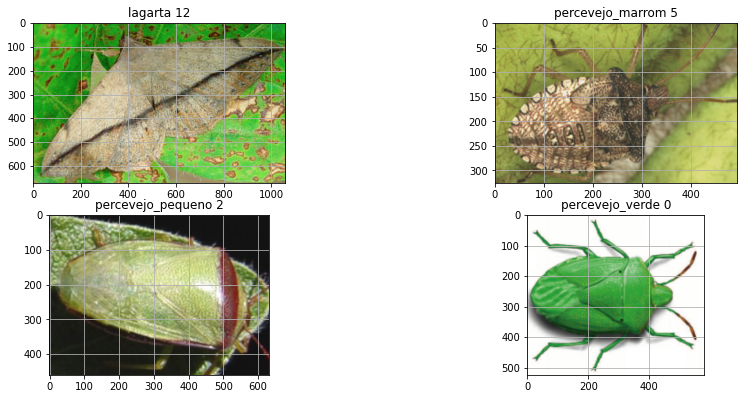

In [11]:
# Exibindo alguns exemplos das imagens convertidas para RGB
plt.figure(figsize=(15,10))
for i, imgs in enumerate(images):
    plt.subplot(3,2,i+1)
    idx = np.random.randint(len(imgs))
    plt.imshow(convert_to_RGB(imgs[idx]))
    plt.grid('off')
    plt.title(CLASS_NAMES[i]+' '+str(idx))
plt.show()

Shape Original:  (406, 342, 3)
Shape Alterado:  (512, 512, 3)


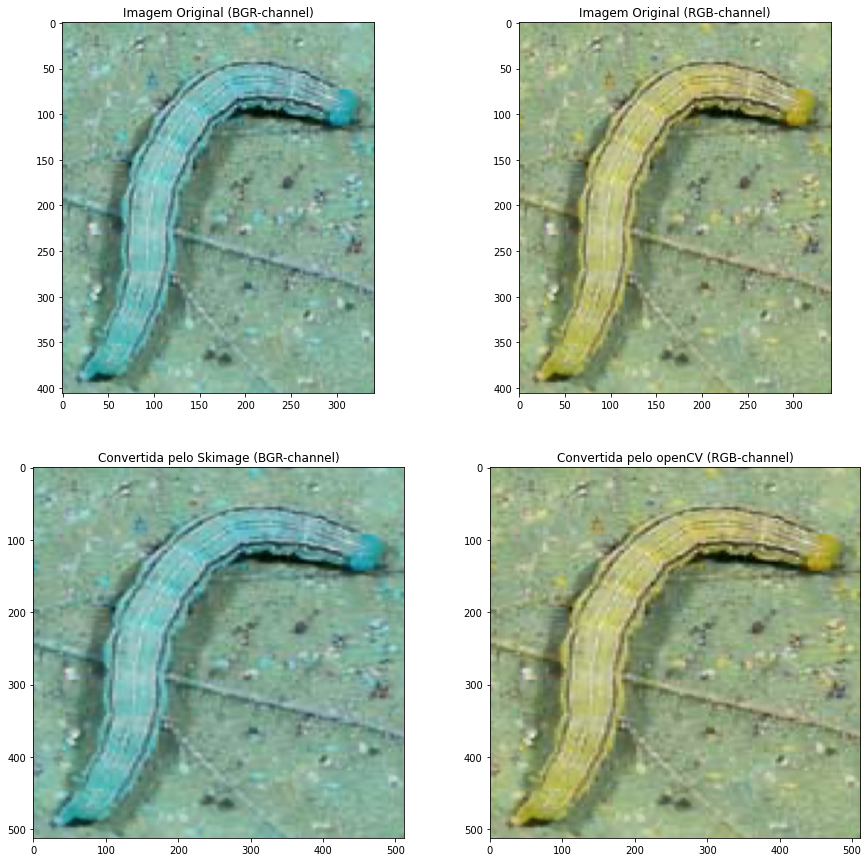

In [12]:
# Redimensionar todas as imagens para 512 x 512

# Definindo o tamanho do shape
img_width, img_height = 512, 512

# Pegando duas imagens de exemplo
img = images[0][2]

# Exibindo o shape original
print('Shape Original: ', img.shape)

# Redimensionando utilizando o skimage
resized_img = resize(img, (img_width, img_height, 3))
print('Shape Alterado: ', resized_img.shape)

# Redimensionando utilizando o openCV
resized_img2 = cv2.resize(img,(img_width, img_height), interpolation = cv2.INTER_CUBIC)

plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.title('Imagem Original (BGR-channel)')
plt.grid(False)
plt.imshow(img)

plt.subplot(2,2,2)
plt.title('Imagem Original (RGB-channel)')
plt.grid(False)
plt.imshow(convert_to_RGB(img))

plt.subplot(2,2,3)
plt.title('Convertida pelo Skimage (BGR-channel)')
plt.grid(False)
plt.imshow((resized_img))

plt.subplot(2,2,4)
plt.title('Convertida pelo openCV (RGB-channel)')
plt.grid(False)
plt.imshow(convert_to_RGB(resized_img2))
plt.show()

In [13]:
# Redimensionando TODAS as imagens com o openCV
resized_images = []
for i,imgs in enumerate(images):
    resized_images.append([cv2.resize(img, (img_width, img_height), interpolation = cv2.INTER_CUBIC) for img in imgs])

In [14]:
## Realizando o split dos dados para treinamento e validação (80/20)

# Criando as listas vazias
train_images = []
val_images   = []

# Loop percorrendo todaas as imagens redimensionadas e preenchendo as listas de treino e validação
for imgs in resized_images:
    train, test = train_test_split(imgs, train_size=0.8, test_size=0.2)
    train_images.append(train)
    val_images.append(test)

In [15]:
## Criando os labels para as imagens de treinamento

# Exibindo a quantidade de dados para treinamento e a distribuição de cada classe
len_train_images = [len(imgs) for imgs in train_images]
print('Total para cada classe: ', len_train_images)
print('Total de imagens para treinamento:', np.sum(len_train_images))  

# Criando os labels de treinamento
train_classe = np.zeros((np.sum(len_train_images)), dtype='uint8')
for i in range(5):
    if i is 0:
        train_classe[:len_train_images[i]] = i
    else:
        train_classe[np.sum(len_train_images[:i]):np.sum(len_train_images[:i+1])] = i

Total para cada classe:  [10, 8, 10, 7]
Total de imagens para treinamento: 35


In [16]:
## Criando os labels para as imagens de validação

# Exibindo a quantidade de dados para validação e a distribuição de cada classe
len_val_images = [len(imgs) for imgs in val_images]
print('Total para cada classe: ', len_val_images)
print('Total de imagens para validação:', np.sum(len_val_images))  

# Criando os labels de validação
val_classe = np.zeros((np.sum(len_val_images)), dtype='uint8')
for i in range(5):
    if i is 0:
        val_classe[:len_val_images[i]] = i
    else:
        val_classe[np.sum(len_val_images[:i]):np.sum(len_val_images[:i+1])] = i

Total para cada classe:  [3, 2, 3, 2]
Total de imagens para validação: 10


In [17]:
## Convertendo as imagens em formato array do numpy para submeter ao treinamento

# Criando listas temporarias
tmp_train_imgs = []
tmp_val_imgs   = []

# Percorrendo o dataset de treinamento e adicionando na lista temporaria
for imgs in train_images:
    tmp_train_imgs += imgs

# Percorrendo o dataset de validação e adicionando na lista temporaria
for imgs in val_images:
    tmp_val_imgs += imgs

# Convertendo em formato array
train_images_np = np.array(tmp_train_imgs)
val_images_np   = np.array(tmp_val_imgs)

# Removendo listas temporarias
del tmp_train_imgs, tmp_val_imgs

In [18]:
print('*** Antes de converter***')
print('train data:', train_images_np.shape)
print('train labels:', train_classe.shape)

# Transformando os dados para o tipo float32
train_data   = train_images_np.astype('float32')
val_data     = val_images_np.astype('float32')

# Converter o array de labels para cada classe em vetores one-hot 
train_labels = np_utils.to_categorical(train_classe, len(CLASS_NAMES))
val_labels   = np_utils.to_categorical(val_classe, len(CLASS_NAMES))

print('\n*** Depois de converter ***')
print('train data:', train_data.shape)
print('train labels:', train_labels.shape)

*** Antes de converter***
train data: (35, 512, 512, 3)
train labels: (35,)

*** Depois de converter ***
train data: (35, 512, 512, 3)
train labels: (35, 4)


## Modelos
- Neste desafio, estarei aplicando 3 arquitetura de redes neurais:

    - O primeiro modelo é uma rede neural convolucional com 3 camadas ocultas, sendo uma estrutura de 32, 64 e 128 neuronios.

In [19]:
# Definindo os parametros gerais para treinamento
batch_size = 16
epochs     = 50

In [20]:
# Função para criar a estrutura de nosso modelo CNN
def create_model_cnn():
    model = Sequential()
    model.add(Conv2D(32, (3,3), padding='same', input_shape=train_data.shape[1:], activation='relu'))
    model.add(Conv2D(32, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(len(CLASS_NAMES)))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
    
    return model

In [21]:
# Função para criar a estrutura de nosso modelo usando como base o modelo pre-treinado VGG19
def create_model_VGG19():
    model = VGG19(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3))

    # Congelando as camadas que não seram treinadas (no caso as 5 primeiras)
    for layer in model.layers[:1]:
        layer.trainable = False

    # Adicionando nova camadas ao nosso modelo
    x = model.output
    x = Flatten()(x)
    x = Dense(1024, activation="relu")(x)
    x = Dropout(0.5)(x)
    x = Dense(1024, activation="relu")(x)
    predictions = Dense(len(CLASS_NAMES), activation="softmax")(x)

    # Criando o modelo final
    final_model = Model(inputs = model.input, outputs = predictions)
    final_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

    return final_model

In [22]:
# Função para criar a estrutura de nosso modelo usando como base o modelo pre-treinado ResNet50
def create_model_ResNet50():

    model = Sequential()

    model.add(ResNet50(weights = "imagenet", include_top=False, pooling='avg'))
    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Dense(2048, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(len(CLASS_NAMES), activation='softmax'))
    model.layers[0].trainable = False
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
    
    return model

In [23]:
# Criando o modelo e verificando a estrutura
model_cnn = create_model_cnn()
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 512, 512, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 510, 510, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 255, 255, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 255, 255, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 255, 255, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 253, 253, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 126, 126, 64)      0

## Data Augmentation

In [24]:
## Aplicando data augmentation para melhorar a performance do modelo

# Para dataset de treinamento
train_datagen = ImageDataGenerator(rescale            = 1./255,
                                   rotation_range     = 40,
                                   width_shift_range  = 0.4,
                                   height_shift_range = 0.4,
                                   shear_range        = 0.2,
                                   zoom_range         = 0.3,
                                   horizontal_flip    = True)

# Para dataset de validação (apenas rescale)
val_datagen = ImageDataGenerator(rescale=1./255)

# Fluxo em batch 32 usando train_datagen
train_generator = train_datagen.flow(train_data,
                                     train_labels,
                                     batch_size=batch_size)

val_generator = val_datagen.flow(val_data,
                                 val_labels,
                                 batch_size=batch_size)

## Treinamento dos modelos

### Modelo Convolution Neural Network

In [25]:
# Marcando o tempo de início
start = time.time()

# Treinamento do modelo
# Realizando o treinamento do modelo CNN
history = model_cnn.fit_generator(generator        = train_generator, 
                                  steps_per_epoch  = len(train_data)/batch_size,
                                  epochs           = epochs, 
                                  validation_steps = len(val_data)/batch_size,
                                  validation_data  = val_generator, 
                                  verbose          = 2)

# Marcando o tempo final
end = time.time()
duration = end - start
print ('\n Modelo CNN - Duração %0.2f segundos (%0.1f minutos) para treinamento de %d epocas'%(duration, duration/60, epochs) )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50


KeyboardInterrupt: 

### Modelo pré-treinado ResNet50

In [ ]:
# Marcando o tempo de início
start = time.time()

# Realizando o treinamento do modelo ResNet50
history_resnet50 = model_ResNet50.fit_generator(generator        = train_generator, 
                                                steps_per_epoch  = len(train_data)/batch_size,
                                                epochs           = epochs, 
                                                validation_steps = len(val_data)/batch_size,
                                                validation_data  = val_generator, 
                                                verbose          = 2)

# Marcando o tempo final
end = time.time()
duration = end - start
print ('\n Modelo ResNet50 - Duração %0.2f segundos (%0.1f minutos) para treinamento de %d epocas'%(duration, duration/60, epochs) )

## Validação do Modelo

In [ ]:
# Função para exibir o desempenho do modelo em treino e teste
def plot_model(model_name, history, epochs):
  
    print(model_name)
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2 ,1)
    plt.plot(np.arange(0, len(history['acc'])), history['acc'], 'r')
    plt.plot(np.arange(1, len(history['val_acc'])+1), history['val_acc'], 'g')
    plt.xticks(np.arange(0, epochs+1, epochs/10))
    plt.title('Training Accuracy vs. Validation Accuracy')
    plt.xlabel('Nro de Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'validation'], loc='best')

    plt.subplot(1, 2, 2)
    plt.plot(np.arange(1, len(history['loss'])+1), history['loss'], 'r')
    plt.plot(np.arange(1, len(history['val_loss'])+1), history['val_loss'], 'g')
    plt.xticks(np.arange(0, epochs+1, epochs/10))
    plt.title('Training Loss vs. Validation Loss')
    plt.xlabel('Nro de Epochs')
    plt.ylabel('Loss')
    plt.legend(['train', 'validation'], loc='best')


    plt.show()